<a href="https://colab.research.google.com/github/kaonmir/I-want-to-study-Data-Science/blob/master/04_Linear_Regression_With_Multiple_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# I use pandas to read csv which is uploaded in github, instead of using numpy with uploading local files
# Because it is simpler than other method:D
# Token'll be expire no long after. re-updating token is necessary

data_test = pd.read_csv("https://raw.githubusercontent.com/kaonmir/MachineLearningAssignment/master/04.%20data_test.csv?token=AJWECOGCV4O6FHNMG3EQYRC6SKUFW",
                   names=['X0', 'X1', 'X2', 'Y'], header=None, dtype=np.float64)
data_train = pd.read_csv("https://raw.githubusercontent.com/kaonmir/MachineLearningAssignment/master/04.%20data_train.csv?token=AJWECOCKZTJKGGLX5SAGSFK6SKUFY",
                   names=['X0', 'X1', 'X2', 'Y'], header=None, dtype=np.float64)

X_test = np.c_[np.ones((len(data_test), 1)), data_test['X0'], data_test['X1'], data_test['X2']]
Y_test = data_test['Y'].to_numpy().reshape(len(data_test['Y']), 1)
X_train = np.c_[np.ones((len(data_train), 1)), data_train['X0'], data_train['X1'], data_train['X2']]
Y_train = data_train['Y'].to_numpy().reshape(len(data_train['Y']), 1)

## 1. Plot the estimated parameters using the training dataset

* Plot the estimated parameters {(θ<sub>0</sub>,θ<sub>1</sub>,θ<sub>2</sub>,θ<sub>3</sub>)} at every iteration of gradient descent until convergence
* The colors for the parameters {(θ<sub>0</sub>,θ<sub>1</sub>,θ<sub>2</sub>,θ<sub>3</sub>)} should be black, red, green, blue, respectively
* The optimization is performed using the training dataset ('data_train.csv')

### Predefinded Function
* cal_cost(theta,X,y): cost
* gradient_descent(X, y, theta,learning_rate=0.01, iterations=100): tuple(theta, cost_history, theta_history)

In [0]:
def cal_cost(theta, X, y):
  if len(theta.shape) == 1:
    theta = theta.reshape((len(theta), 1))
  m = len(y)
  
  cost = (1/(2*m)) * np.sum(np.square(X.dot(theta)-y))
  return cost

In [0]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
   
    m = len(y)
    cost_history = np.zeros(iterations, dtype=np.float64)
    theta_history = np.zeros((iterations, theta.size), dtype=np.float64)

    for it in range(iterations):
        theta_history[it, :] = theta.T
        cost_history[it] = cal_cost(theta,X,y)

        err = X.dot(theta) - y
        theta = theta - ((learning_rate/m) * X.T.dot(err))

    return theta, cost_history, theta_history

### Making result and plotting

In [0]:
#define general variable
lr =0.000021
n_iter = 10000
theta_train = np.array([1, 1, 1, 1]).reshape((4, 1)).astype(np.float64)


theta_train, cost_train_history, theta_train_history = gradient_descent(X_train, Y_train, theta_train, lr, n_iter)

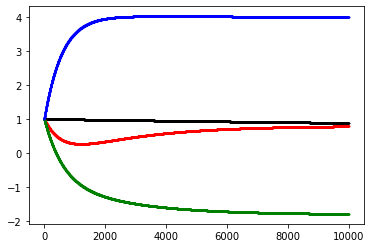

In [152]:
# black, red, green, blue
colors = ['k', 'r', 'g', 'b']

plt.figure()
for idx in range(4):
#idx = 1
  plt.scatter(range(len(theta_train_history[:, idx])), theta_train_history[:, idx], c=colors[idx], s=0.5)

## 2. Plot the training error using the training dataset

plot the training error J(θ<sub>0</sub>,θ<sub>1</sub>,θ<sub>2</sub>,θ<sub>3</sub>) at every iteration of gradient descent until convergence (in blue color)



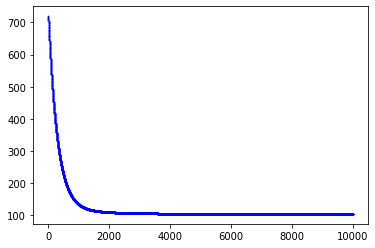

In [153]:
plt.figure()
plt.scatter(range(len(cost_train_history)), cost_train_history, c='b', s=0.5)


In [21]:
X_train[0][1]

0.27354771453665605

In [37]:
cost_train_history

NameError: ignored